<a href="https://colab.research.google.com/github/horizonking/-myproject/blob/main/India_athelete_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the Required Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="darkgrid")


#2. Load the Data

In [12]:
# Load the datasets
data = pd.read_csv('/content/athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

#3. Explore and Clean the Data

In [13]:
# Display the first few rows of the datasets
print(data.head())
print(regions.head())

# Get a summary of the data
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [14]:
# Remove entries with NaN values in the Medal column
data = data[data['Medal'].notnull()]

#4. Merge DataFrames
Merge the data and regions DataFrames on the NOC column to enrich the dataset with region information:

In [15]:
# Merge data and regions DataFrames
merged = pd.merge(data, regions, on='NOC', how='left')

#5. Analyze Indian Athletes' Performance
Extract data specific to Indian athletes for detailed analysis:

In [16]:
# Filter the data for Indian athletes
data_india = merged[merged['NOC'] == 'IND']

# Display the first few rows of the Indian athletes data
print(data_india.head())

       ID                 Name Sex   Age  Height  Weight   Team  NOC  \
492  2699          Shaukat Ali   M  30.0     NaN     NaN  India  IND   
493  2703     Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
529  2864  Richard James Allen   M  25.0   172.0     NaN  India  IND   
530  2864  Richard James Allen   M  30.0   172.0     NaN  India  IND   
531  2864  Richard James Allen   M  34.0   172.0     NaN  India  IND   

           Games  Year  Season         City   Sport                Event  \
492  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
493  1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
529  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
530  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
531  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   

    Medal region notes  
492  Gold  India   NaN  
493  Gold  India   NaN  
529  Gold  India   NaN  
530  Gold 

#6. Visualize Medal Trends
Create visualizations to explore trends in India's medal performance over the years.

##Medals Won by Year

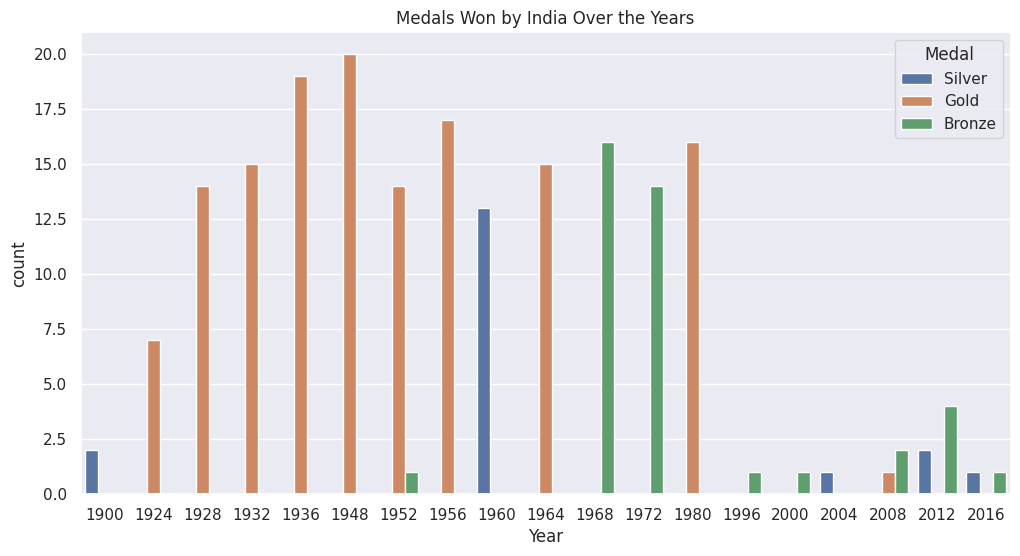

In [17]:
# Plot medals won by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Medal', data=data_india)
plt.title('Medals Won by India Over the Years')
plt.show()

##Medals by Sport

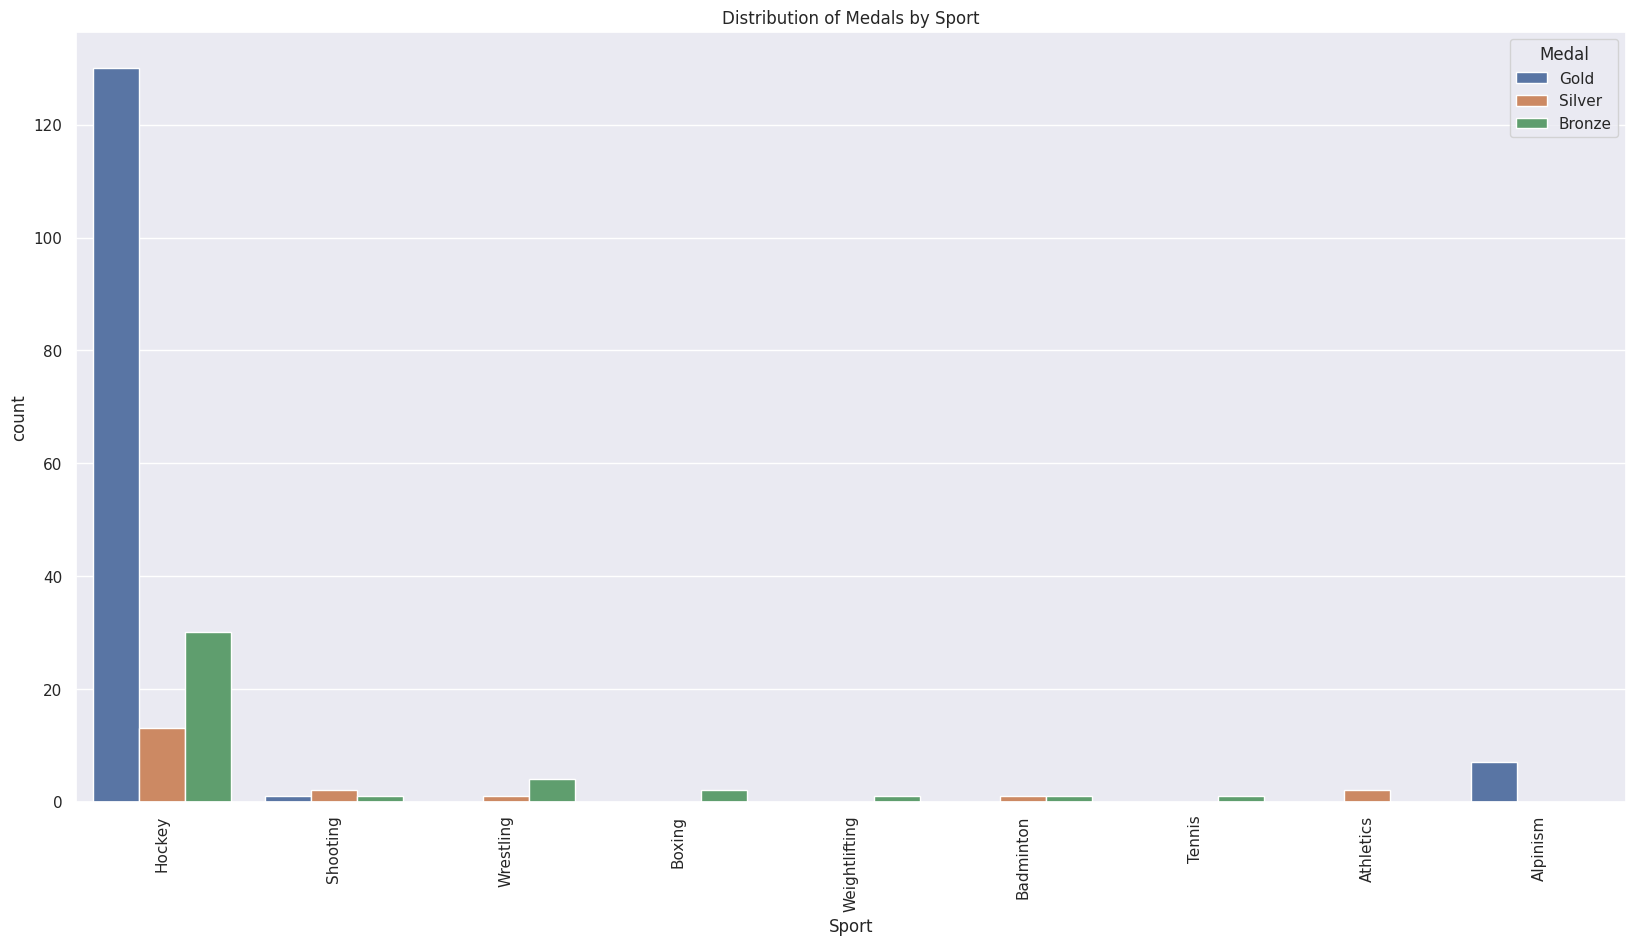

In [18]:
# Plot distribution of medals by sport
plt.figure(figsize=(20, 10))
sns.countplot(x='Sport', hue='Medal', data=data_india)
plt.title('Distribution of Medals by Sport')
plt.xticks(rotation=90)
plt.show()

#7. Analyze Indian Women in Athletics
Focus on the participation and achievements of Indian women in the Olympics:

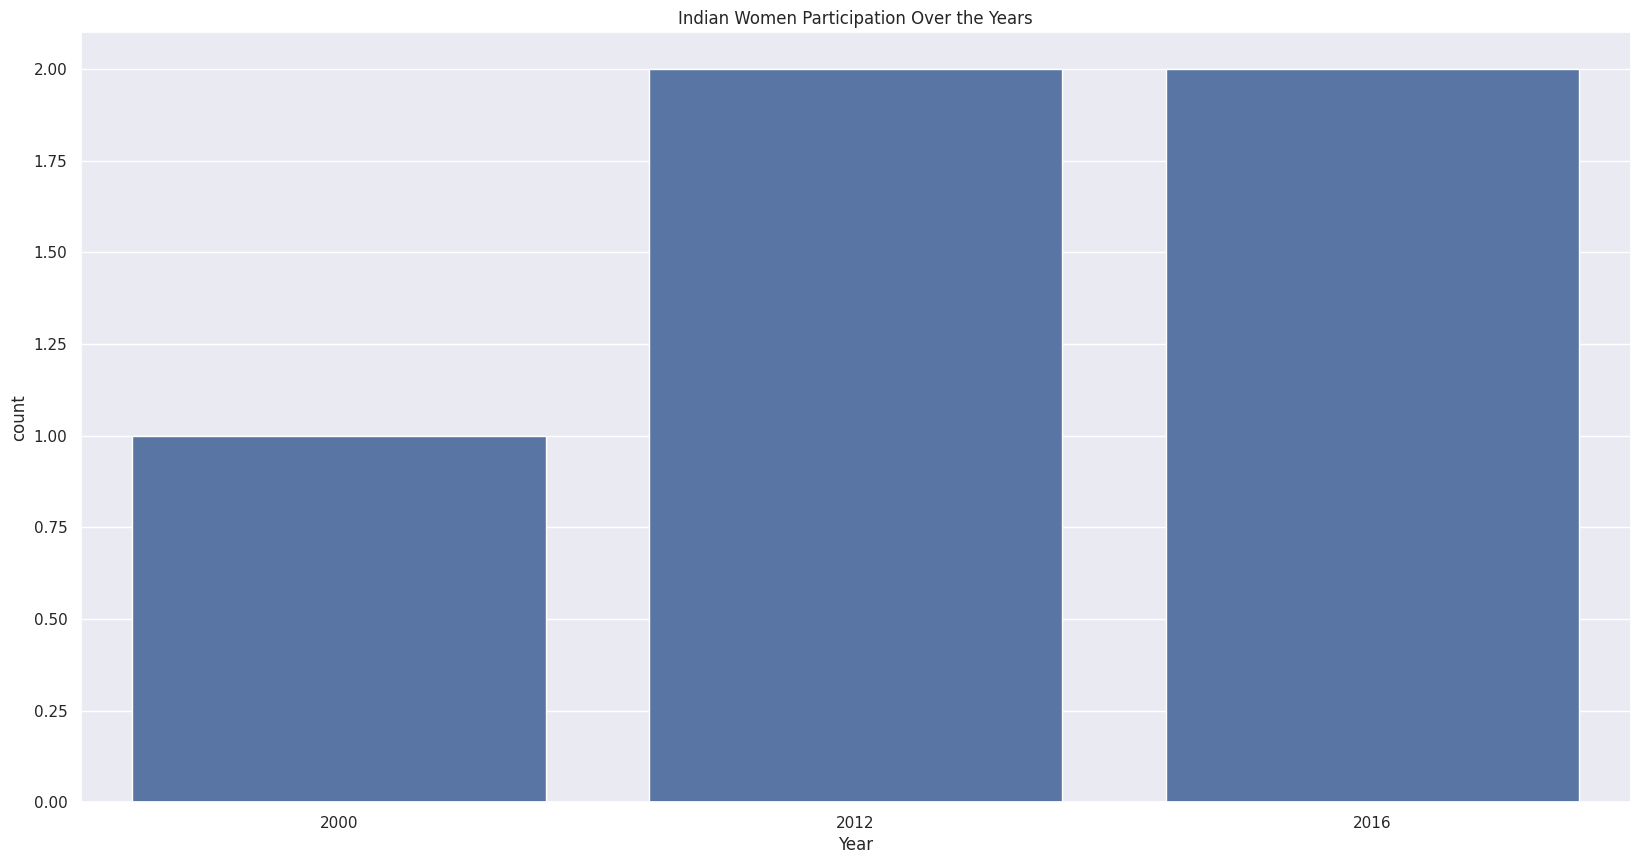

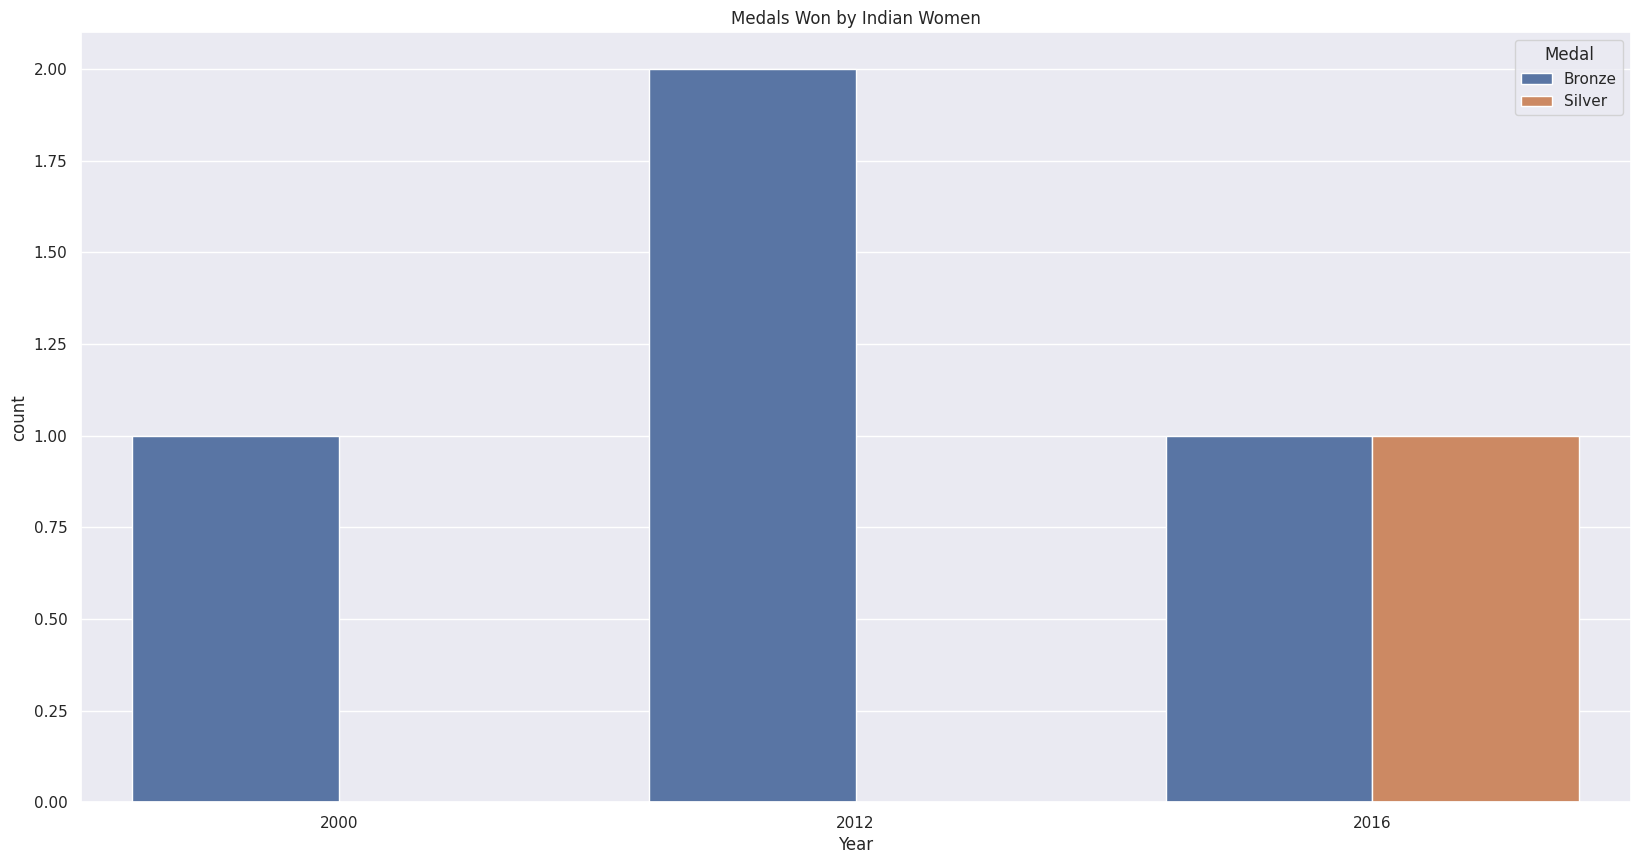

In [19]:
# Filter data for Indian women athletes
women_in_olympics = merged[(merged['Sex'] == 'F') & (merged['NOC'] == 'IND')]

# Plot women's participation over the years
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women_in_olympics)
plt.title('Indian Women Participation Over the Years')
plt.show()

# Plot medals won by Indian women
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', hue='Medal', data=women_in_olympics)
plt.title('Medals Won by Indian Women')
plt.show()

#6. Compare India's Performance with Other Countries
To understand India's standing in the Olympics, we can compare its performance with other countries across various metrics like total medals, gold medals, and trends over time.

##Total Medals Comparison

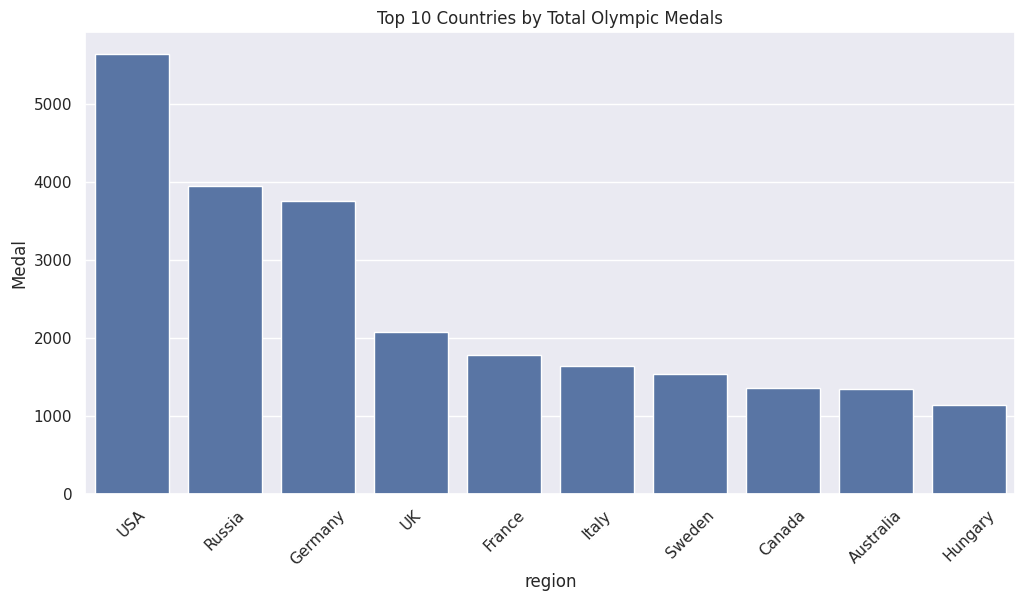

In [20]:
# Group data by country and count total medals
total_medals = merged[merged['Medal'].notnull()].groupby('region')['Medal'].count().reset_index()

# Sort by total medals and select top 10 countries
top_countries = total_medals.sort_values(by='Medal', ascending=False).head(10)

# Plot the top countries by total medals
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Medal', data=top_countries)
plt.title('Top 10 Countries by Total Olympic Medals')
plt.xticks(rotation=45)
plt.show()

#Gold Medals Over Time

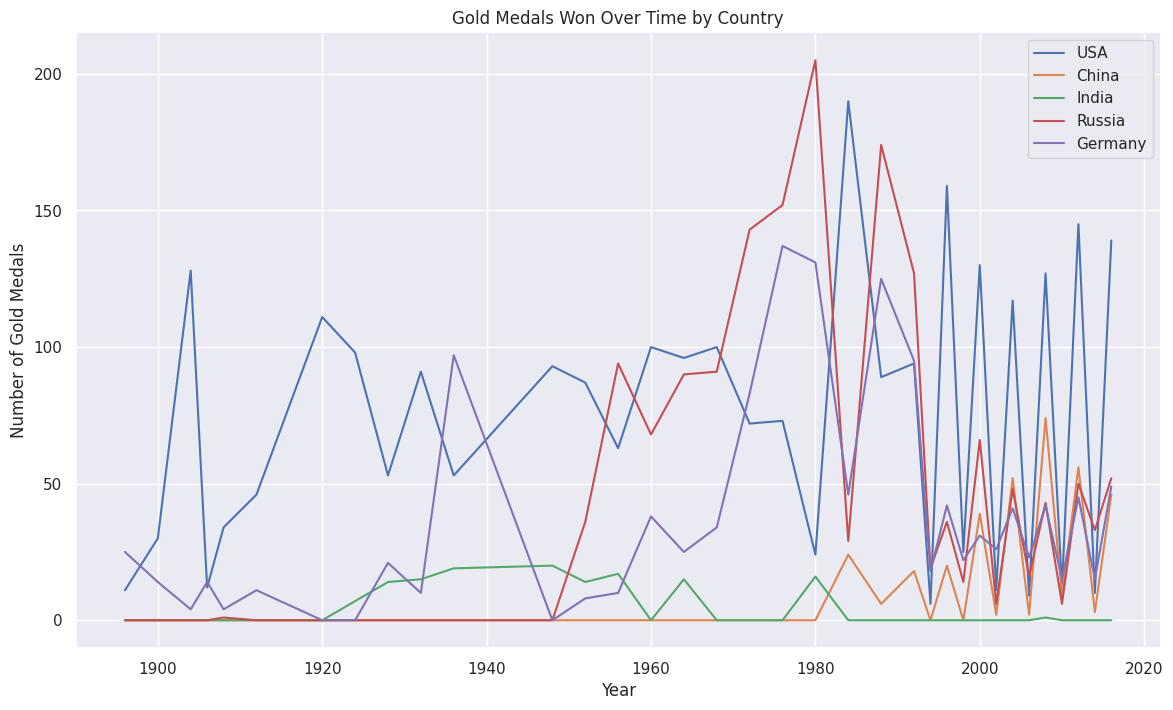

In [22]:
# Group data by year and country, filtering for gold medals
gold_medals_by_year = merged[merged['Medal'] == 'Gold'].groupby(['Year', 'region'])['Medal'].count().reset_index()

# Pivot the table for easier plotting
gold_pivot = gold_medals_by_year.pivot(index='Year', columns='region', values='Medal').fillna(0)

# Plot gold medal trends over time for selected countries
selected_countries = ['USA', 'China', 'India', 'Russia', 'Germany']
plt.figure(figsize=(14, 8))
for country in selected_countries:
    plt.plot(gold_pivot.index, gold_pivot[country], label=country)

plt.title('Gold Medals Won Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()
plt.show()


#7. Analyze the Impact of Hosting the Games
Investigate whether hosting the Olympics has a noticeable effect on a country's medal count.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


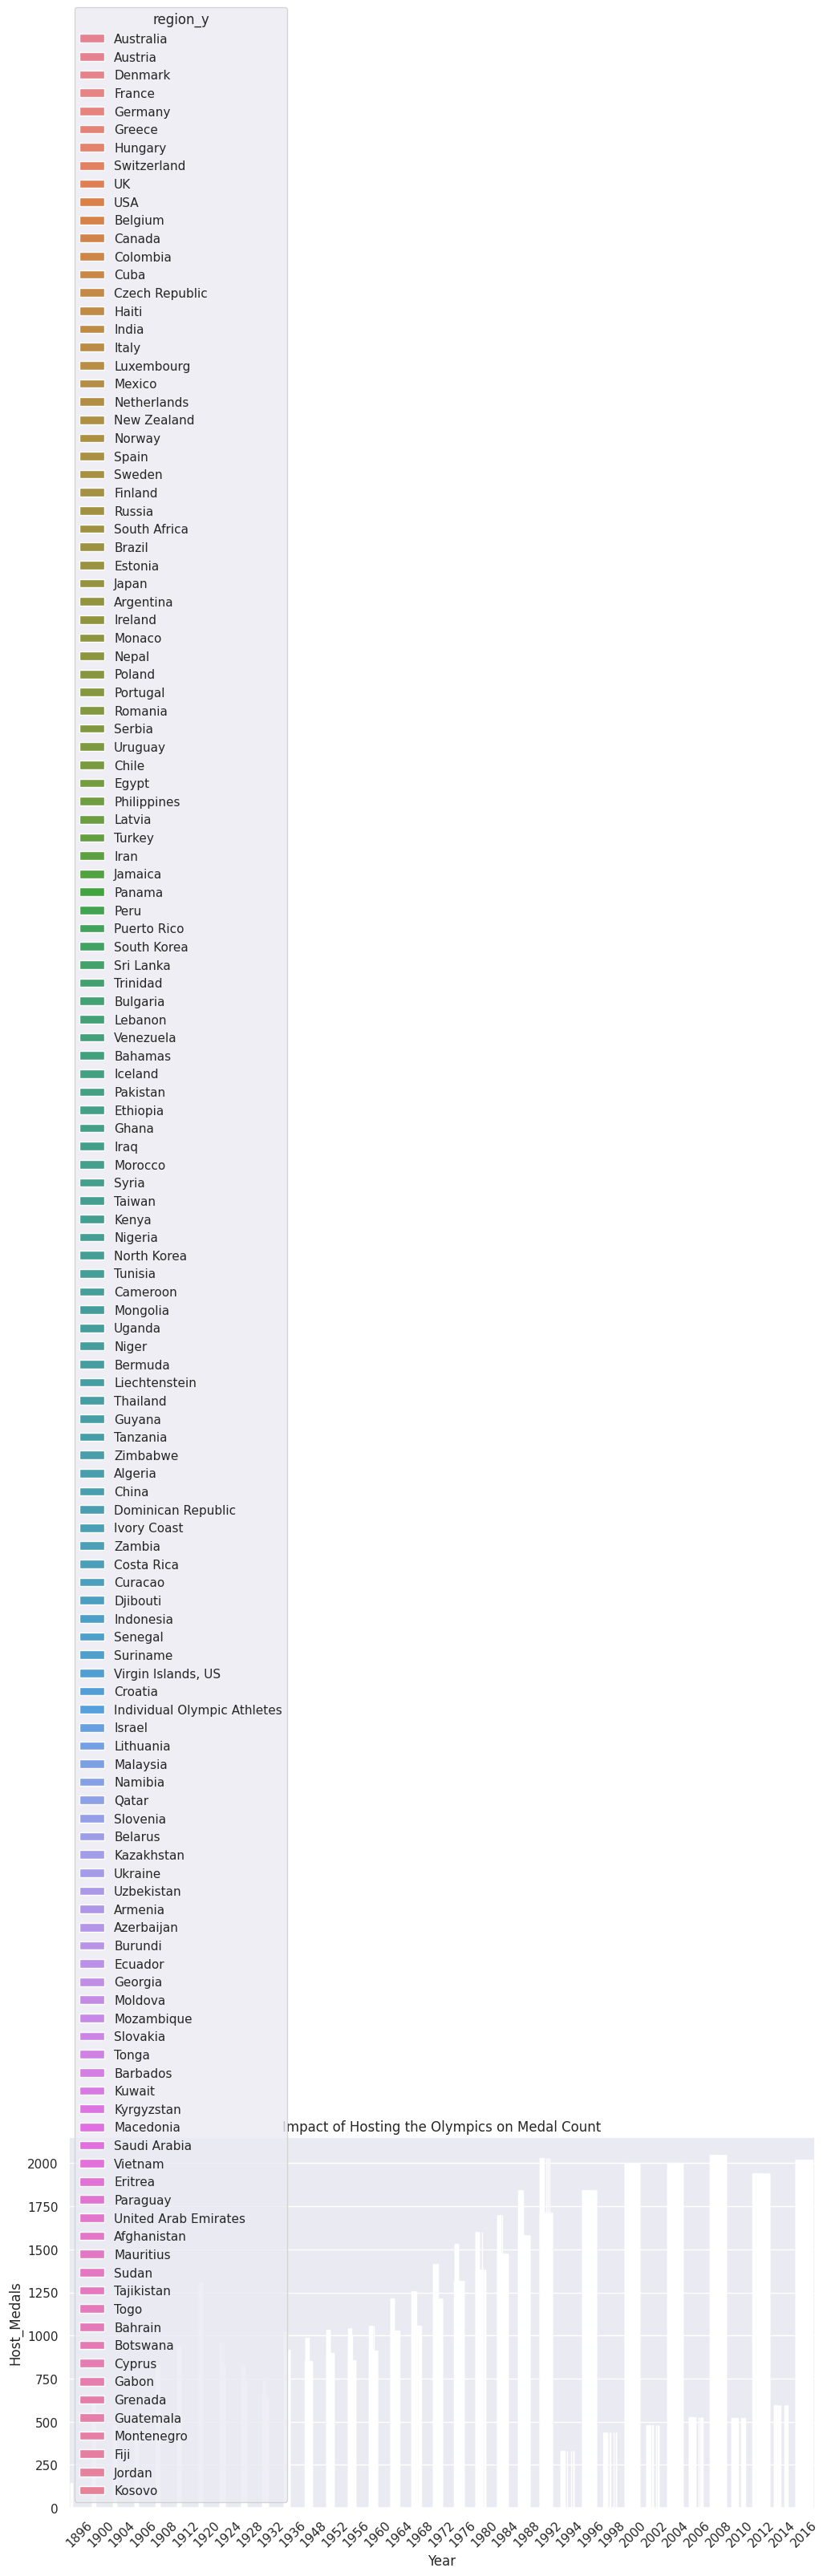

In [23]:
# Identify host cities and their corresponding countries
host_cities = merged[['City', 'Year', 'region']].drop_duplicates()

# Merge host city data with medal data
host_medals = pd.merge(merged, host_cities, on=['City', 'Year'])

# Count medals for host countries during their host years
host_medal_counts = host_medals[host_medals['Medal'].notnull()].groupby(['Year', 'region_y'])['Medal'].count().reset_index(name='Host_Medals')

# Plot the impact of hosting on medal count
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Host_Medals', hue='region_y', data=host_medal_counts)
plt.title('Impact of Hosting the Olympics on Medal Count')
plt.xticks(rotation=45)
plt.show()

8. Explore Trends in Medal Distribution by Sport
Analyze how India's performance varies across different sports and how this compares to global trends.

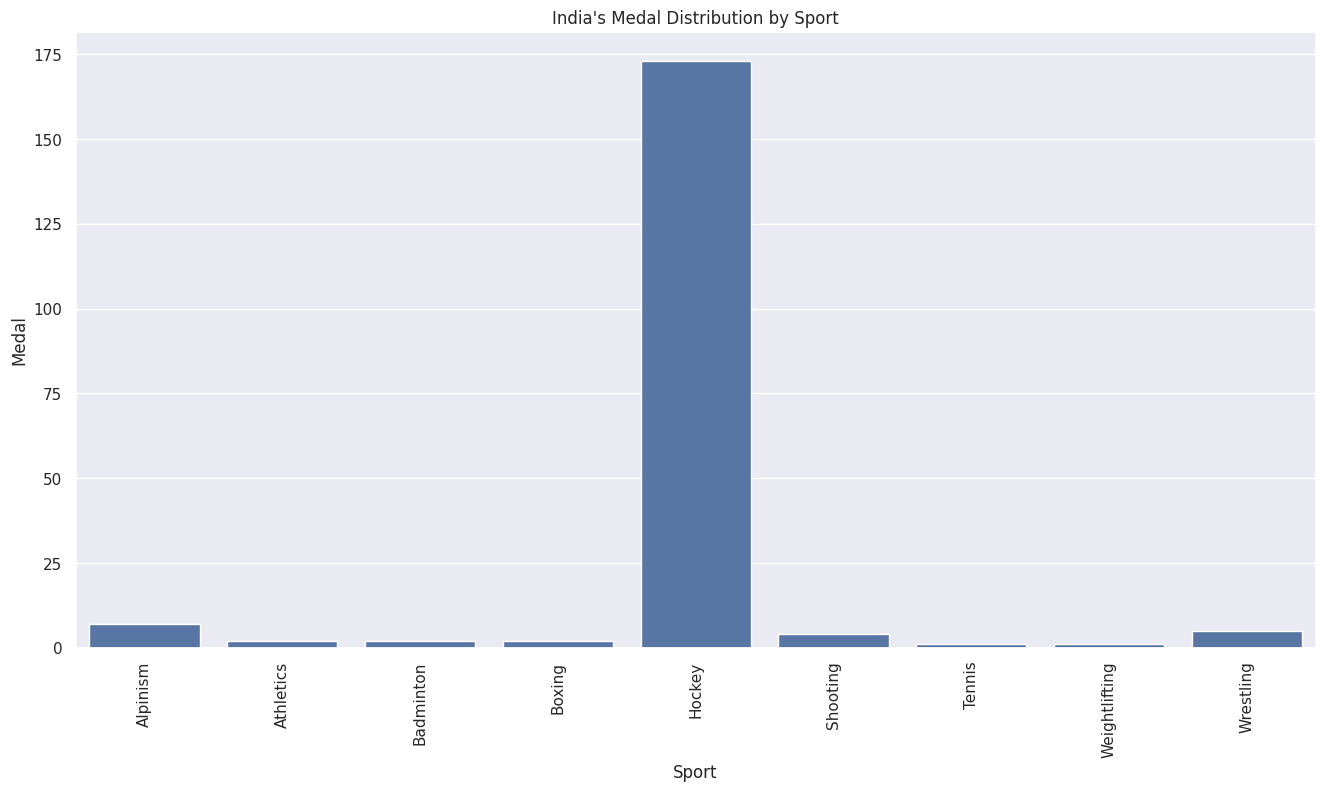

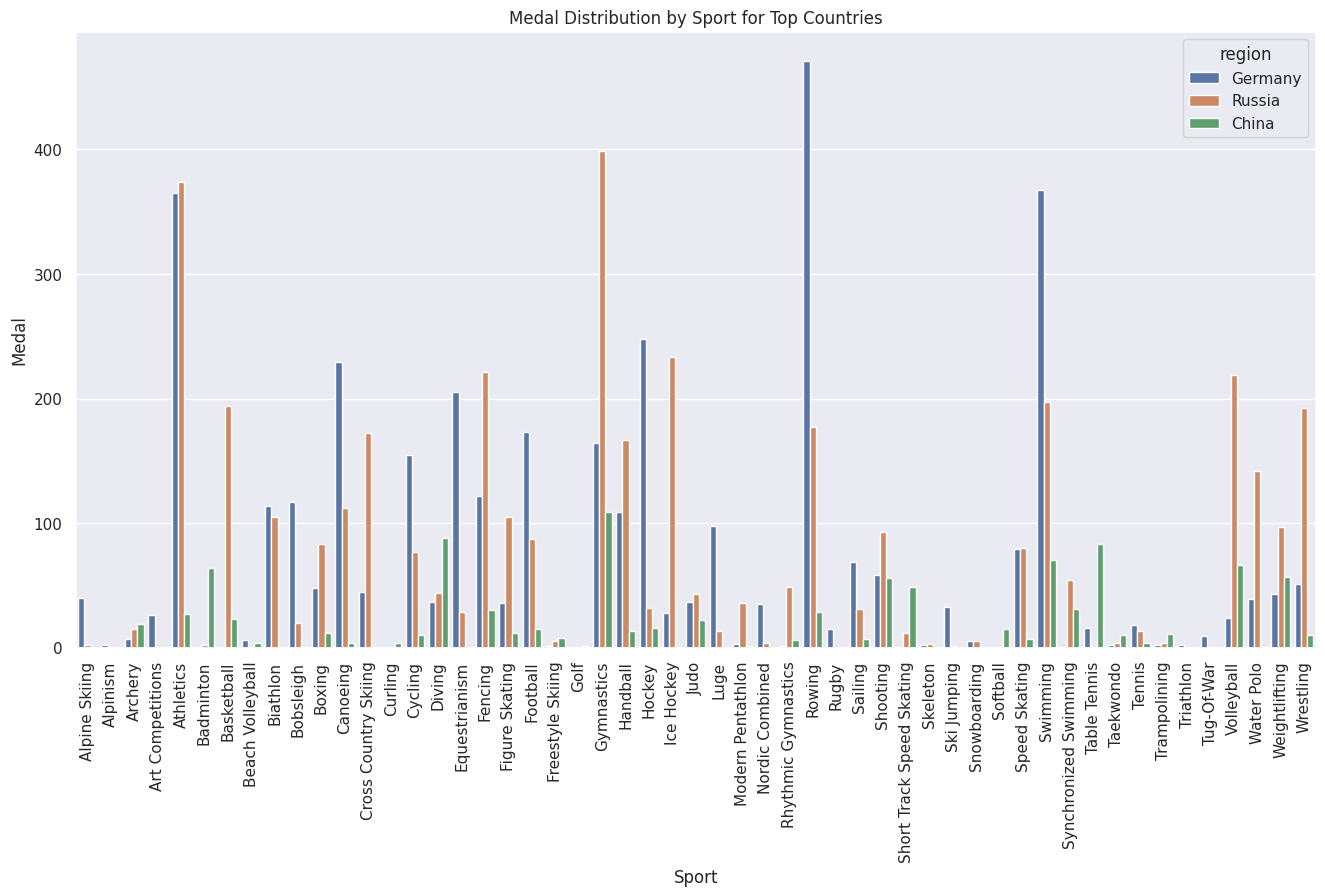

In [26]:
# Group data by sport and country, and count medals
medals_by_sport = merged[merged['Medal'].notnull()].groupby(['Sport', 'region'])['Medal'].count().reset_index()

# Filter data for India and other major countries
sports_india = medals_by_sport[medals_by_sport['region'] == 'India']
sports_top_countries = medals_by_sport[medals_by_sport['region'].isin(['United States', 'China', 'Russia', 'Germany'])]

# Plot India's medal distribution by sport
plt.figure(figsize=(16, 8))
sns.barplot(x='Sport', y='Medal', data=sports_india)
plt.title('India\'s Medal Distribution by Sport')
plt.xticks(rotation=90)
plt.show()

# Compare with top countries
plt.figure(figsize=(16, 8))
sns.barplot(x='Sport', y='Medal', hue='region', data=sports_top_countries)
plt.title('Medal Distribution by Sport for Top Countries')
plt.xticks(rotation=90)
plt.show()